In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
logins = pd.read_json('logins.json')
ultimate_data = pd.read_json('ultimate_data_challenge.json')

In [3]:
logins.head(25)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [4]:
ultimate_data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [5]:
logins.max()

login_time   1970-04-13 18:57:38
dtype: datetime64[ns]

In [6]:
logins.dtypes

login_time    datetime64[ns]
dtype: object

In [7]:
logins.set_index('login_time',inplace=True)

In [8]:
# Can measure trends from beginning of the month to end of the month
# Can also measure overally daily trends. What does the average day look like?
# Theres not enough data for the whole year or over the span of many years so we are a bit limited.

In [9]:
logins.dtypes

Series([], dtype: object)

In [10]:
logins_15_min = logins.resample('15T').size()

In [11]:
logins_15_min

login_time
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
                      ..
1970-04-13 17:45:00    5
1970-04-13 18:00:00    5
1970-04-13 18:15:00    2
1970-04-13 18:30:00    7
1970-04-13 18:45:00    6
Freq: 15T, Length: 9788, dtype: int64

In [12]:
logins_jan = logins_15_min.loc['1970-01-01':'1970-01-31']
logins_feb = logins_15_min.loc['1970-02-01':'1970-02-28'] 
logins_march = logins_15_min.loc['1970-03-01':'1970-03-31']
logins_april = logins_15_min.loc['1970-04-01':'1970-04-30']

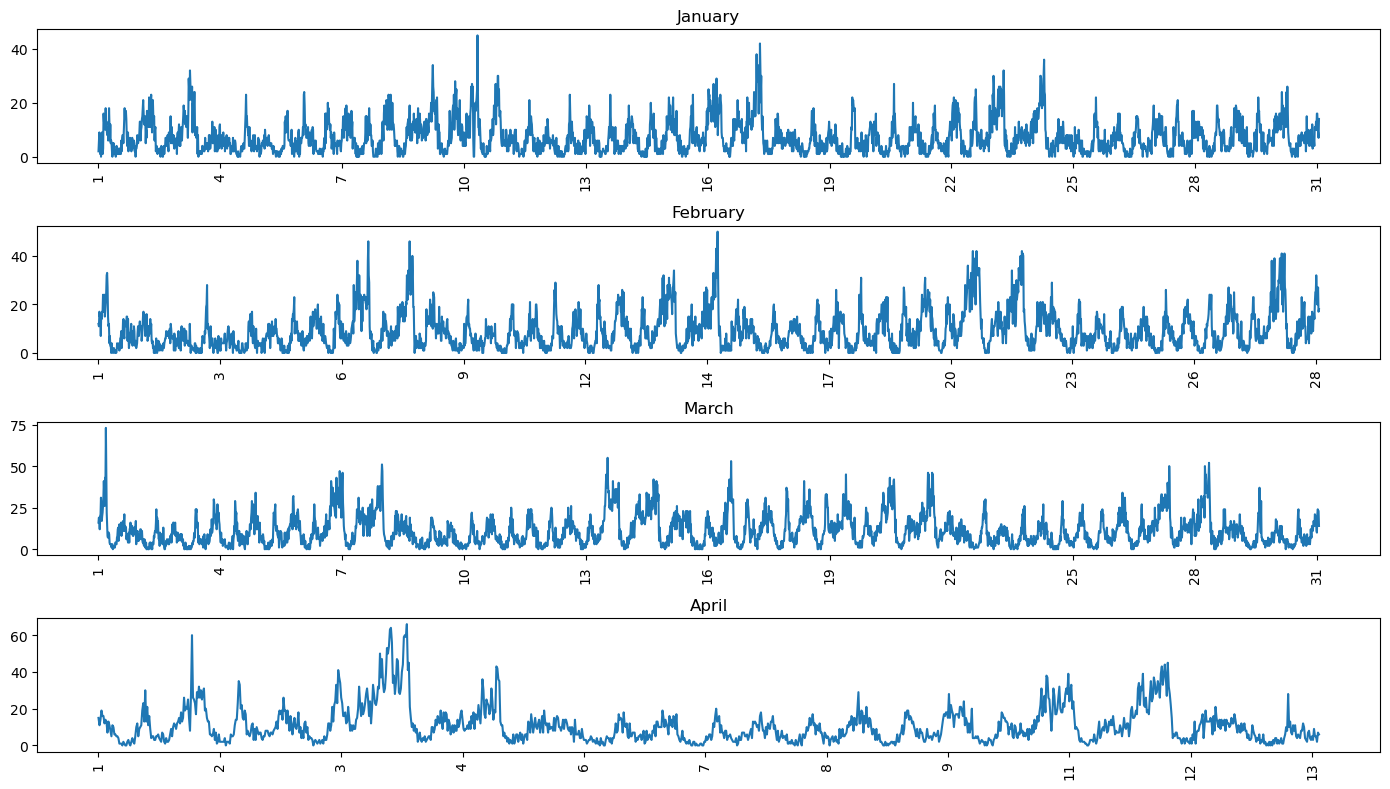

In [13]:
fig, axes = plt.subplots(4, 1, figsize=(14, 8))

# January
axes[0].plot(logins_jan)
axes[0].set_title('January')
axes[0].set_xticks(logins_jan.index[::int(len(logins_jan)/10)]) 
axes[0].set_xticklabels([date.day for date in logins_jan.index[::int(len(logins_jan)/10)]])
axes[0].tick_params(axis='x', rotation=90)

# February
axes[1].plot(logins_feb)
axes[1].set_title('February')
axes[1].set_xticks(logins_feb.index[::int(len(logins_feb)/10)]) 
axes[1].set_xticklabels([date.day for date in logins_feb.index[::int(len(logins_feb)/10)]])
axes[1].tick_params(axis='x', rotation=90)

# March
axes[2].plot(logins_march)
axes[2].set_title('March')
axes[2].set_xticks(logins_march.index[::int(len(logins_march)/10)]) 
axes[2].set_xticklabels([date.day for date in logins_march.index[::int(len(logins_march)/10)]])
axes[2].tick_params(axis='x', rotation=90)

# April
axes[3].plot(logins_april)
axes[3].set_title('April')
axes[3].set_xticks(logins_april.index[::int(len(logins_april)/10)]) 
axes[3].set_xticklabels([date.day for date in logins_april.index[::int(len(logins_april)/10)]])
axes[3].tick_params(axis='x', rotation=90)


plt.tight_layout()
plt.show()

It looks like there is some trend from day to day. It appears that logins are having predictable spikes and that later in the day is more popular perhaps because of people coming home from work. 

Text(0.5, 1.0, 'Log in amounts distribution')

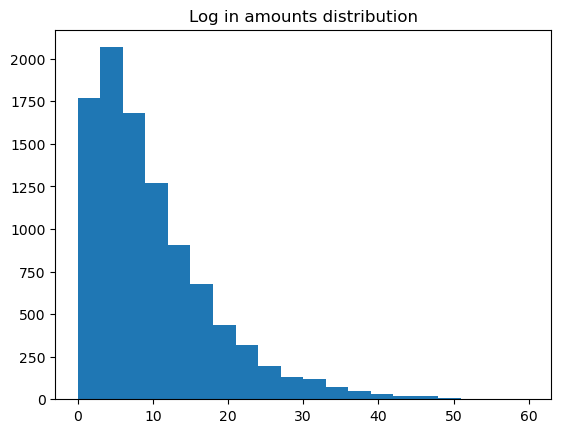

In [14]:
plt.hist(logins_15_min,bins=20, range=(0, 60))
plt.title('Log in amounts distribution')

In [15]:
logins_daily_avgs = logins_15_min.index.strftime('%H:%M')

In [16]:
logins_daily_avgs

Index(['20:00', '20:15', '20:30', '20:45', '21:00', '21:15', '21:30', '21:45',
       '22:00', '22:15',
       ...
       '16:30', '16:45', '17:00', '17:15', '17:30', '17:45', '18:00', '18:15',
       '18:30', '18:45'],
      dtype='object', name='login_time', length=9788)

In [17]:
np.max(logins_daily_avgs)

'23:45'

In [18]:
np.min(logins_daily_avgs)

'00:00'

In [19]:
logins_daily_avgs = list(logins_daily_avgs)

In [20]:
time_minutes = [int(time.split(':')[0])*60 + int(time.split(':')[1]) for time in logins_daily_avgs]



In [21]:
np.std(time_minutes)

415.65485233687815

In [22]:
np.mean(time_minutes)

712.3161013485901

In [23]:
np.median(time_minutes)

705.0

In [24]:
first_day_of_month = logins_15_min[logins_15_min.index.day.isin([1])]

In [25]:
first_day_of_month.index = first_day_of_month.index.strftime('%H:%M')

In [26]:
first_day_of_month = pd.DataFrame(first_day_of_month)

In [27]:
first_day_of_month['times'] = first_day_of_month.index

In [28]:
only_times = first_day_of_month['times'].value_counts()

In [29]:
only_times.head()

20:00    4
22:15    4
20:15    4
23:45    4
23:30    4
Name: times, dtype: int64

# Part 2



My metric for success would be what percentage of full time drivers accepted at least 1 ride each day in the opposing city over the span of two weeks. I choose full time drivers because they will cover longer time spans and provide better insights as compared to somebody who drives just a few hours here and there. I also choose percentage rather than a single number, because a number doesnt tell us how many total drivers there are and is not a very useful metric. I set the time span to once a day and for two weeks because there may be drivers who experiment with accepting trips in the opposing city but decide they dont like it even despite not having to pay the toll. By setting the standard to once a day and over a two week time frame should give a more clear idea if drivers are truly accepting more trips in the opposing city due to the experiment. 

The experiment I would design would be to create a new dataframe with only full time drivers and include featurers such as origin city, number of rides taken in home city, number taken in opposite city, and have this data over a two week time frame. Having this data would allow us to see if the percentage of rides being taken in the opposing city is increasing, staying about the same or declining over time. A longer time frame could also be considered to have more reliable insights but either way ew could plot a time series of percentage of full time drivers against different criterias. The ones I would want to see would be percentage of full time drivers taking at least X rides per day in the opposing city over Y time span and we could plug in different values. I would also want to see a percentage of a singe drivers total rides which were in the opposing city and plot it on a histogram to see the distribution of how many drivers fall into each percentage block. ex 1-5% 5-10 etc.

In [30]:
ultimate_data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [31]:
ultimate_data['signup_date'].max()

'2014-01-31'

In [32]:
ultimate_data['signup_date'].min()

'2014-01-01'

In [33]:
ultimate_data['last_trip_date'].max()

'2014-07-01'

In [34]:
ultimate_data.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [35]:
ultimate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


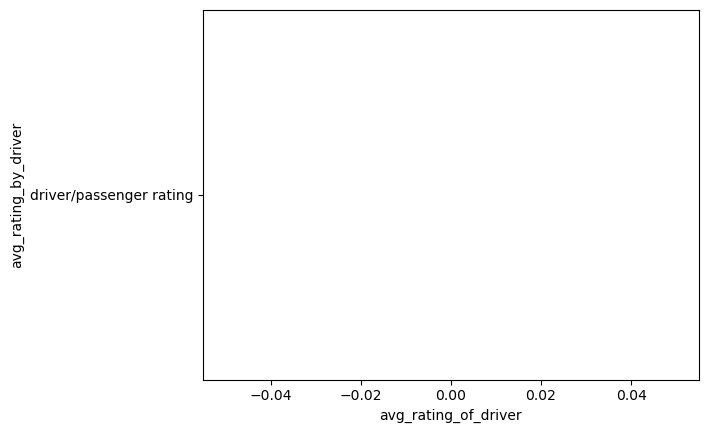

In [36]:
sns.scatterplot(data=ultimate_data, x='avg_rating_of_driver',y='avg_rating_by_driver')
plt.plot('driver/passenger rating')

It seems like there is no correlation between driver rating and passenger rating. Drivers seem more likely to give a poor rating than passengers

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '1.5'),
  Text(2, 0, '1.6'),
  Text(3, 0, '1.7000000000000002'),
  Text(4, 0, '1.8'),
  Text(5, 0, '1.9'),
  Text(6, 0, '2.0'),
  Text(7, 0, '2.1'),
  Text(8, 0, '2.2'),
  Text(9, 0, '2.3'),
  Text(10, 0, '2.4'),
  Text(11, 0, '2.5'),
  Text(12, 0, '2.6'),
  Text(13, 0, '2.7'),
  Text(14, 0, '2.8'),
  Text(15, 0, '2.9'),
  Text(16, 0, '3.0'),
  Text(17, 0, '3.1'),
  Text(18, 0, '3.2'),
  Text(19, 0, '3.3'),
  Text(20, 0, '3.4'),
  Text(21, 0, '3.5'),
  Text(22, 0, '3.6'),
  Text(23, 0, '3.7'),
  Text(24, 0, '3.8'),
  Text(25, 0, '3.9'),
  Text(26, 0, '4.0'),
  Text(27, 0, '4.1'),
  Text(28, 0, '4.2'),
  Text(29, 0, '4.3'),
  Text(30, 0, '4.4'),
  Text(31, 0, '4.5'),
  Text(32, 0, '4.6'),
  Text(33, 0, '4.7'),
  Text(34, 0, '4.8'),
  Text(35, 0, '4.9'),
  Text(36, 0, '5.0')])

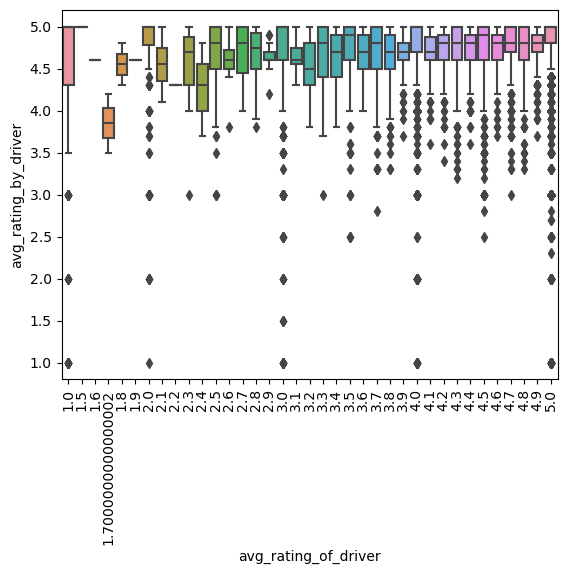

In [37]:
sns.boxplot(data=ultimate_data, x='avg_rating_of_driver',y='avg_rating_by_driver')
plt.xticks(rotation=90)

In [38]:
#This code will find all users who are considered active
active = []
for i in ultimate_data['last_trip_date']:
    if i >= '2014-06-01':
        active.append(1)
    else:
        active.append(0)

In [39]:
ultimate_data['active'] = active

In [40]:
ultimate_data

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,1
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,0


Text(0.5, 1.0, 'Trips taken in first 30 days of signup')

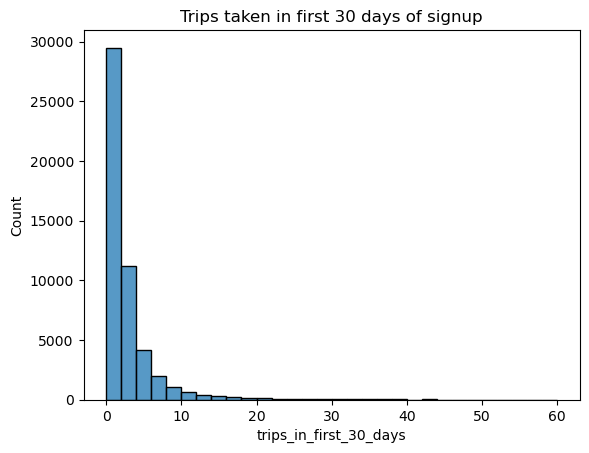

In [41]:
sns.histplot(data=ultimate_data,x='trips_in_first_30_days',bins = list(range(0, 61, 2)))
plt.title("Trips taken in first 30 days of signup")

The majority of users seem to take just a few rides within the first 30 days

Text(0.5, 1.0, 'avg distance vs num of trips in first 30 days')

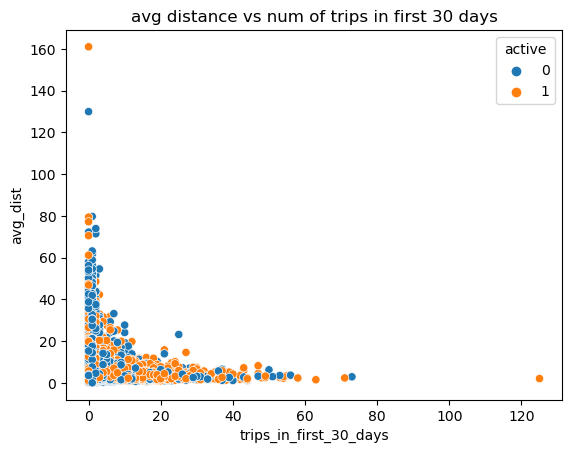

In [42]:
sns.scatterplot(data=ultimate_data,x='trips_in_first_30_days',y='avg_dist',hue='active')
plt.title('avg distance vs num of trips in first 30 days')

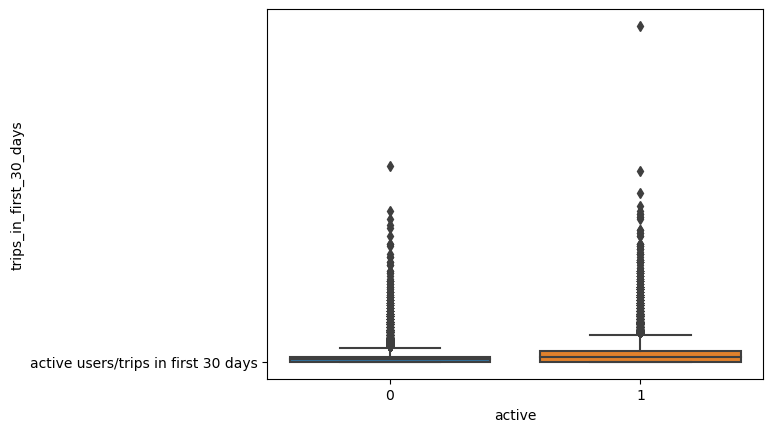

In [43]:
sns.boxplot(data=ultimate_data, x='active',y='trips_in_first_30_days')
plt.plot('active users/trips in first 30 days')

The active users on average show to have taken slighly more trips in the first 30 days to non active users

Text(0.5, 1.0, 'active users vs surge %')

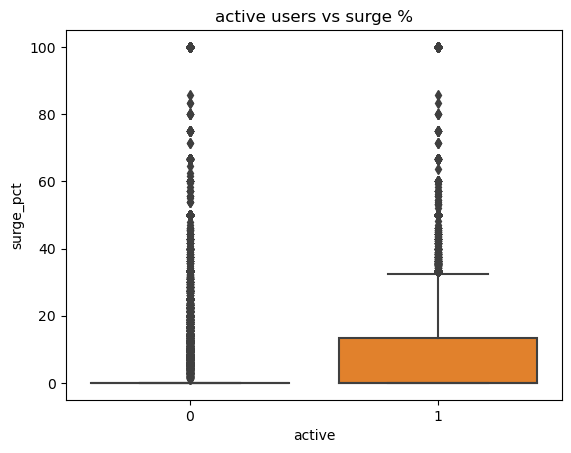

In [44]:
sns.boxplot(data=ultimate_data, x='active',y='surge_pct')
plt.title('active users vs surge %')

This data is interesting showing that active users paid higher surge multipliers on average than non active users

<Axes: xlabel='active', ylabel='avg_surge'>

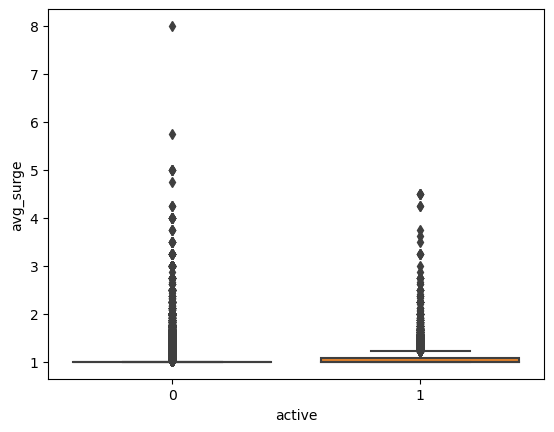

In [45]:
sns.boxplot(data=ultimate_data, x='active',y='avg_surge')

<Axes: xlabel='active', ylabel='trips_in_first_30_days'>

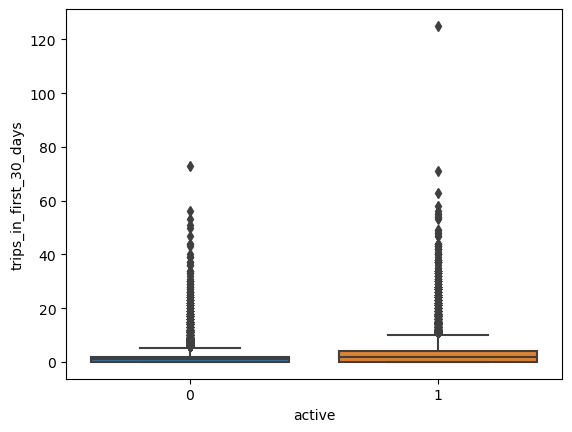

In [46]:
sns.boxplot(data=ultimate_data, x='active',y='trips_in_first_30_days')

Text(0.5, 1.0, 'percentage of users of each phone who are active')

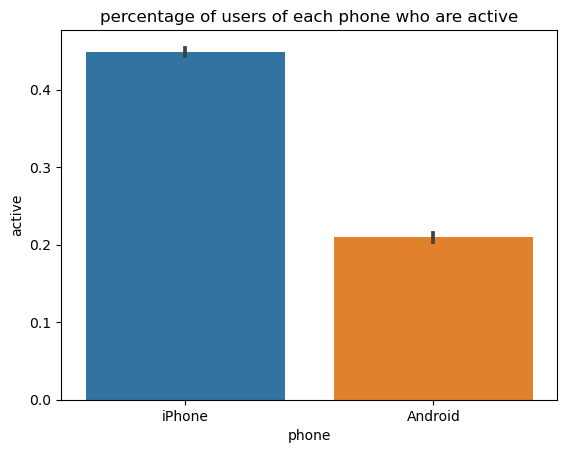

In [47]:
sns.barplot(data=ultimate_data, y='active',x='phone')
plt.title('percentage of users of each phone who are active')

Most of the active users are iphone users but this could be because iphone users are more represented in the data

<Axes: xlabel='phone', ylabel='count'>

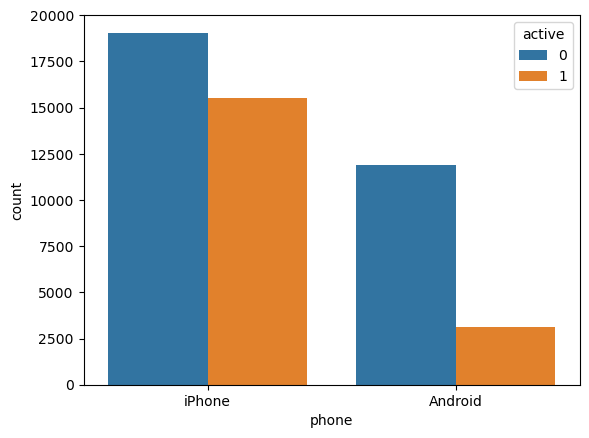

In [48]:
sns.countplot(data=ultimate_data,x='phone',hue='active')

This plot confirms that there are more iphone users who are active both by amount and percentage of their respective category. It makes it safer to say that iphone users are more likely to be active users.

Text(0.5, 1.0, 'Surge distrubution')

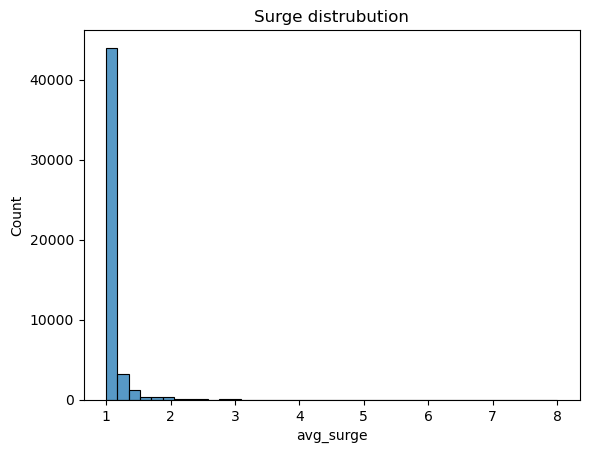

In [49]:
sns.histplot(data=ultimate_data,x='avg_surge',bins=40)
plt.title('Surge distrubution')

Most people are at a 1x surge or slighter higher. There a some outliers who have payed up to a 3x surge

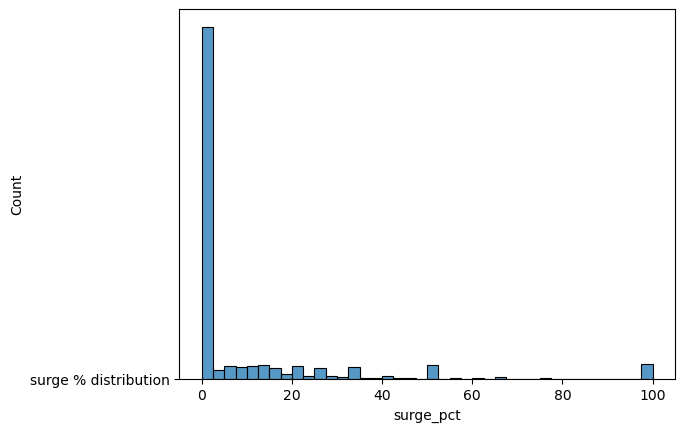

In [50]:
sns.histplot(data=ultimate_data,x='surge_pct',bins=40)
plt.plot('surge % distribution')

In [51]:
ultimate_data['ultimate_black_user'] = ultimate_data['ultimate_black_user'].replace({True:1,False:0})

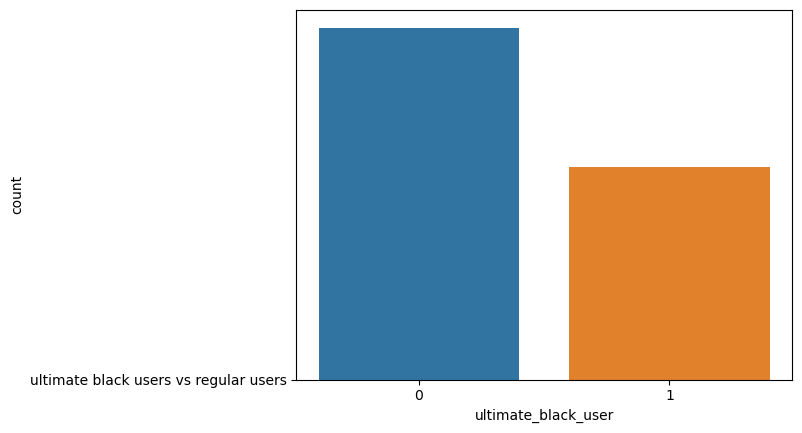

In [52]:
sns.countplot(data=ultimate_data,x='ultimate_black_user')
plt.plot('ultimate black users vs regular users')

In [53]:
active_riders = ultimate_data[ultimate_data['last_trip_date'] >= '2014-06-01']

In [54]:
active_riders['last_trip_date'].min()

'2014-06-01'

In [55]:
active_riders.shape

(18804, 13)

In [56]:
ultimate_data.shape

(50000, 13)

In [57]:
ultimate_data['active'].value_counts()

0    31196
1    18804
Name: active, dtype: int64

In [58]:
print(f"{round((18804/50000),2) * 100}% of clients were retained")

38.0% of clients were retained


Text(0.5, 1.0, 'Active vs Inactive Users')

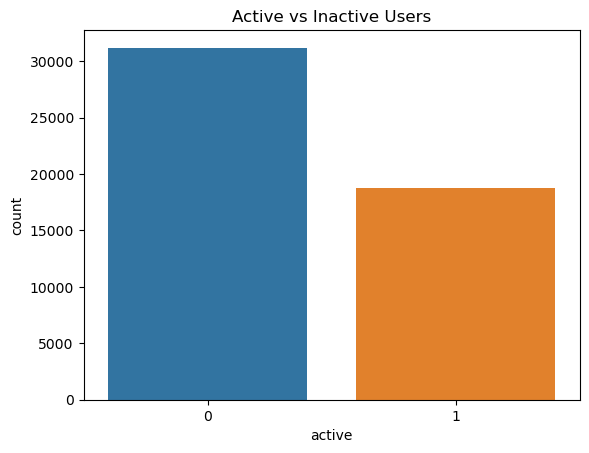

In [59]:
sns.countplot(data= ultimate_data,x='active')
plt.title('Active vs Inactive Users')

Roughly 38 percent of users were considered active. About 19,000 of the 50,000 users continued using the app after signing up

In [60]:
ultimate_data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9,0


In [61]:
ultimate_data['city'].unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [62]:
ultimate_data.drop(['signup_date','last_trip_date'],inplace=True,axis=1)

In [63]:
ultimate_data.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,4.7,1.10,iPhone,15.4,1,46.2,3.67,5.0,1
1,Astapor,0,5.0,1.00,Android,0.0,0,50.0,8.26,5.0,0
2,Astapor,3,4.3,1.00,iPhone,0.0,0,100.0,0.77,5.0,0
3,King's Landing,9,4.6,1.14,iPhone,20.0,1,80.0,2.36,4.9,1
4,Winterfell,14,4.4,1.19,Android,11.8,0,82.4,3.13,4.9,0


In [64]:
ultimate_data.corr()

C:\Users\mainf\AppData\Local\Temp\ipykernel_36780\1055399330.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ultimate_data.corr()


,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
trips_in_first_30_days,1.000000,-0.011302,-0.001841,0.005720,0.112210,0.050388,-0.136329,-0.039115,0.210463
avg_rating_of_driver,-0.011302,1.000000,-0.026189,-0.003899,-0.002086,0.014630,0.034509,0.123175,-0.011653
avg_surge,-0.001841,-0.026189,1.000000,0.793582,-0.078791,-0.110071,-0.081491,0.010597,-0.003333
surge_pct,0.005720,-0.003899,0.793582,1.000000,-0.106861,-0.144918,-0.104414,0.020103,0.011797
ultimate_black_user,0.112210,-0.002086,-0.078791,-0.106861,1.000000,0.035998,0.032310,0.009343,0.205002
weekday_pct,0.050388,0.014630,-0.110071,-0.144918,0.035998,1.000000,0.101652,0.020442,0.009693
avg_dist,-0.136329,0.034509,-0.081491,-0.104414,0.032310,0.101652,1.000000,0.080540,-0.092780
avg_rating_by_driver,-0.039115,0.123175,0.010597,0.020103,0.009343,0.020442,0.080540,1.000000,-0.026791
active,0.210463,-0.011653,-0.003333,0.011797,0.205002,0.009693,-0.092780,-0.026791,1.000000


C:\Users\mainf\AppData\Local\Temp\ipykernel_36780\1939737627.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ultimate_data.corr())


<Axes: >

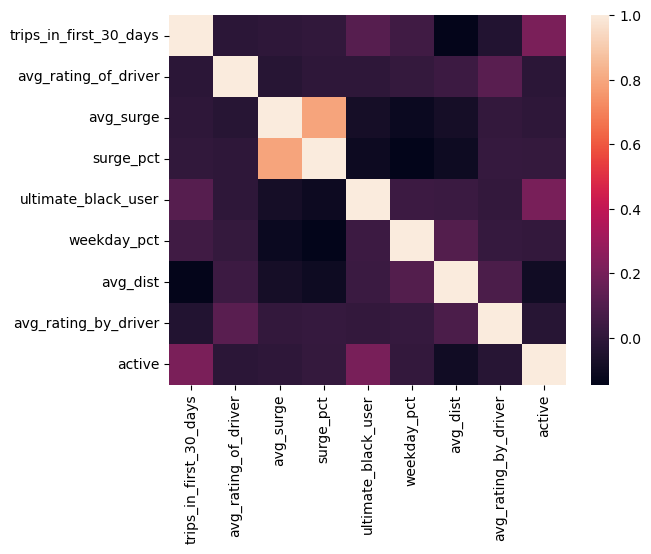

In [65]:
sns.heatmap(ultimate_data.corr())

The most highly correlated features are avg_surge and surge_pct which makes sense because they are very similar features.

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [67]:
df_dummies = pd.get_dummies(ultimate_data,columns=['phone','city'],drop_first=True)

In [68]:
df_dummies.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,phone_iPhone,city_King's Landing,city_Winterfell
0,4,4.7,1.10,15.4,1,46.2,3.67,5.0,1,1,1,0
1,0,5.0,1.00,0.0,0,50.0,8.26,5.0,0,0,0,0
2,3,4.3,1.00,0.0,0,100.0,0.77,5.0,0,1,0,0
3,9,4.6,1.14,20.0,1,80.0,2.36,4.9,1,1,1,0
4,14,4.4,1.19,11.8,0,82.4,3.13,4.9,0,0,0,1


<Axes: >

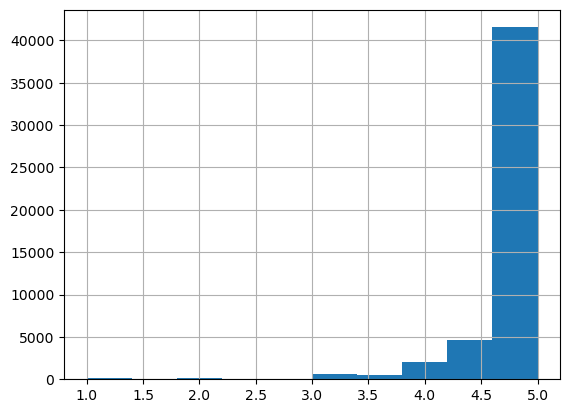

In [69]:
df_dummies['avg_rating_by_driver'].hist()

<Axes: >

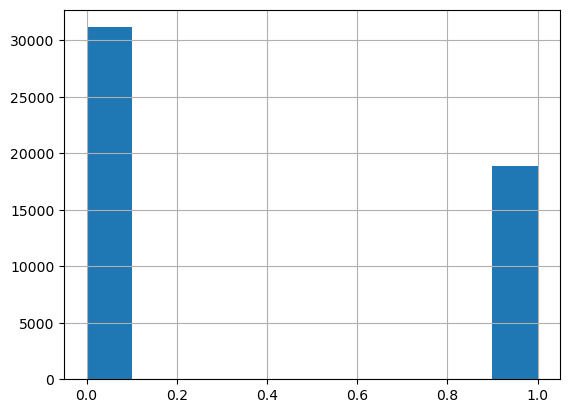

In [70]:
df_dummies['ultimate_black_user'].hist()

In [71]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
X = imputer.fit_transform(df_dummies.drop('active',axis=1))

In [72]:
X.shape

(50000, 11)

In [73]:
y = df_dummies['active']

In [74]:
y.shape

(50000,)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

I will try a logistic regression for my first model since it is a standard and reliable classifier for a binary target value

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [77]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

C:\Users\mainf\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [78]:
y_preds = model1.predict(X_test)

In [79]:
confusion_matrix(y_test,y_preds)

array([[8008, 1337],
       [2920, 2735]], dtype=int64)

In [80]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79      9345
           1       0.67      0.48      0.56      5655

    accuracy                           0.72     15000
   macro avg       0.70      0.67      0.68     15000
weighted avg       0.71      0.72      0.70     15000



I want to see if scaling the data will yield better results

In [81]:
model2 = LogisticRegression()
model2.fit(X_train_scaled, y_train)

LogisticRegression()

In [82]:
y_preds_scaled = model2.predict(X_test_scaled)

In [83]:
print(classification_report(y_test,y_preds_scaled))

              precision    recall  f1-score   support

           0       0.73      0.85      0.79      9345
           1       0.67      0.48      0.56      5655

    accuracy                           0.71     15000
   macro avg       0.70      0.67      0.67     15000
weighted avg       0.71      0.71      0.70     15000



In [84]:
print(confusion_matrix(y_test,y_preds_scaled))

[[7972 1373]
 [2914 2741]]


I dont see much of a change in results from using scaled data. I will now try a grid search to optimize the hyperparameters of Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
param_grid = {
    'C': [0.01, 0.1, 1, 10], 
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200], 
    'penalty': ['l2', 'none']
}

model = LogisticRegression()
grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1)  # Using 3-fold cross-validation and all available CPU cores
grid_search.fit(X_train, y_train)


C:\Users\mainf\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
24 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mainf\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mainf\anaconda3\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mainf\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fit
    solver = _

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'max_iter': [100, 200],
                         'penalty': ['l2', 'none'],
                         'solver': ['lbfgs', 'liblinear']})

In [86]:
best_params = grid_search.best_params_
print(best_params)

{'C': 0.01, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}


In [87]:
best_preds = grid_search.predict(X_test)

In [88]:
print(confusion_matrix(y_test,best_preds))

[[8080 1260]
 [2994 2666]]


Previous models results

    precision    recall  f1-score   support

           0       0.74      0.85      0.79      9383
           1       0.66      0.49      0.56      5617

    accuracy                           0.71     15000
   macro avg       0.70      0.67      0.68     15000
weighted avg       0.71      0.71      0.70     15000

In [89]:
print(classification_report(y_test,best_preds))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79      9340
           1       0.68      0.47      0.56      5660

    accuracy                           0.72     15000
   macro avg       0.70      0.67      0.67     15000
weighted avg       0.71      0.72      0.70     15000



The Grid search did yield some slightly better results, but nothing too dramatic. Im now gonna do a gridsearch over several different models to see If another model will give me better predictions.

This next block takes a long time to run so ive just taken the best parameters and put them into the variable best_params in the next code block. 

model_param_grid = [
    {'classifier': [LogisticRegression()], 
     'classifier__penalty': ['l2'],  
     'classifier__C': [0.1, 1, 10]},  
    
    {'classifier': [RandomForestClassifier()],
     'classifier__n_estimators': [10, 100],  
     'classifier__max_features': ['sqrt']},  
    
    {'classifier': [SVC()],
     'classifier__C': [0.1, 1], 
     'classifier__kernel': ['linear']}  
]

pipeline = Pipeline([('classifier', LogisticRegression())])


grid_search = GridSearchCV(pipeline, model_param_grid, cv=3, n_jobs=-1)
grid_search.fit(X, y)


print("Best parameters found: ", grid_search.best_params_)

Random Forest was shown to be the best model. I will now run another grid search on different hyperparameters of Random Forest to see if I can improve results

In [91]:
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

model = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)


grid_search.fit(X, y)


print("Best parameters found: ", grid_search.best_params_)

C:\Users\mainf\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
508 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mainf\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mainf\anaconda3\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\mainf\anaconda3\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\mainf\anaconda3\Lib\site-pack

Best parameters found:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 500}


In [92]:
y_preds = grid_search.predict(X_test)

In [93]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      9340
           1       0.78      0.68      0.72      5660

    accuracy                           0.80     15000
   macro avg       0.80      0.78      0.79     15000
weighted avg       0.80      0.80      0.80     15000



In [ ]:
              precision    recall  f1-score   support

           0       0.74      0.86      0.79      9271
           1       0.68      0.50      0.58      5729

    accuracy                           0.72     15000
   macro avg       0.71      0.68      0.68     15000
weighted avg       0.72      0.72      0.71     15000

That seemed to give a notiecable boost to performance, especially in the recall for postive values. Next im going to try creating new features for the null values in phone, avg rating by driver and avg rating of driver to see if these added features improve model performance. I will also remove extreme outliers in the data

In [94]:
print(confusion_matrix(y_test,y_preds))

[[8232 1108]
 [1828 3832]]


In [ ]:
[[7948 1323]
 [2864 2865]]

In [95]:
ultimate_data.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,4.7,1.10,iPhone,15.4,1,46.2,3.67,5.0,1
1,Astapor,0,5.0,1.00,Android,0.0,0,50.0,8.26,5.0,0
2,Astapor,3,4.3,1.00,iPhone,0.0,0,100.0,0.77,5.0,0
3,King's Landing,9,4.6,1.14,iPhone,20.0,1,80.0,2.36,4.9,1
4,Winterfell,14,4.4,1.19,Android,11.8,0,82.4,3.13,4.9,0


In [96]:
ultimate_data.isna().sum()

city                         0
trips_in_first_30_days       0
avg_rating_of_driver      8122
avg_surge                    0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
active                       0
dtype: int64

In [97]:
ultimate_data['no_rating_by_driver'] = ultimate_data['avg_rating_by_driver'].isna()
ultimate_data['hasnt_rated_driver'] = ultimate_data['avg_rating_of_driver'].isna()
ultimate_data['null_phone'] = ultimate_data['phone'].isna()

In [98]:
ultimate_data['no_rating_by_driver']

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Name: no_rating_by_driver, Length: 50000, dtype: bool

In [99]:
ultimate_data['no_rating_by_driver'].replace({False:0,True:1},inplace=True)
ultimate_data['hasnt_rated_driver'].replace({False:0,True:1},inplace=True)
ultimate_data['null_phone'].replace({False:0,True:1},inplace=True)

In [100]:
ultimate_data.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,no_rating_by_driver,hasnt_rated_driver,null_phone
0,King's Landing,4,4.7,1.10,iPhone,15.4,1,46.2,3.67,5.0,1,0,0,0
1,Astapor,0,5.0,1.00,Android,0.0,0,50.0,8.26,5.0,0,0,0,0
2,Astapor,3,4.3,1.00,iPhone,0.0,0,100.0,0.77,5.0,0,0,0,0
3,King's Landing,9,4.6,1.14,iPhone,20.0,1,80.0,2.36,4.9,1,0,0,0
4,Winterfell,14,4.4,1.19,Android,11.8,0,82.4,3.13,4.9,0,0,0,0


In [101]:

ultimate_data.quantile(.99)

C:\Users\mainf\AppData\Local\Temp\ipykernel_36780\1821280780.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ultimate_data.quantile(.99)


trips_in_first_30_days     18.00
avg_rating_of_driver        5.00
avg_surge                   2.00
surge_pct                 100.00
ultimate_black_user         1.00
weekday_pct               100.00
avg_dist                   27.76
avg_rating_by_driver        5.00
active                      1.00
no_rating_by_driver         0.00
hasnt_rated_driver          1.00
null_phone                  0.00
Name: 0.99, dtype: float64

In [102]:
#Here Im removing any extreme outliers
quantiles = ultimate_data.quantile(0.99)

for column in ultimate_data.select_dtypes(include=['number']).columns:
    ultimate_data = ultimate_data[ultimate_data[column] <= quantiles[column]]

C:\Users\mainf\AppData\Local\Temp\ipykernel_36780\834779893.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quantiles = ultimate_data.quantile(0.99)


In [103]:
ultimate_data.shape

(40378, 14)

In [104]:
ultimate_data_dummies = pd.get_dummies(ultimate_data)

In [105]:
ultimate_data_dummies.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,no_rating_by_driver,hasnt_rated_driver,null_phone,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,4.7,1.10,15.4,1,46.2,3.67,5.0,1,0,0,0,0,1,0,0,1
1,0,5.0,1.00,0.0,0,50.0,8.26,5.0,0,0,0,0,1,0,0,1,0
2,3,4.3,1.00,0.0,0,100.0,0.77,5.0,0,0,0,0,1,0,0,0,1
3,9,4.6,1.14,20.0,1,80.0,2.36,4.9,1,0,0,0,0,1,0,0,1
4,14,4.4,1.19,11.8,0,82.4,3.13,4.9,0,0,0,0,0,0,1,1,0


In [106]:
ultimate_data_dummies.isnull().sum()

trips_in_first_30_days    0
avg_rating_of_driver      0
avg_surge                 0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
active                    0
no_rating_by_driver       0
hasnt_rated_driver        0
null_phone                0
city_Astapor              0
city_King's Landing       0
city_Winterfell           0
phone_Android             0
phone_iPhone              0
dtype: int64

In [107]:
X = np.array(ultimate_data_dummies.drop('active',axis=1))
y = ultimate_data_dummies['active']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

In [109]:
params = {
    'criterion': 'entropy',
    'max_depth': 10,
    'max_features': 'log2',
    'min_samples_leaf': 1,
    'min_samples_split': 5,
    'n_estimators': 200
}
rfmodel = RandomForestClassifier(**params)

In [110]:
rfmodel.fit(X_train,y_train)
y_preds = rfmodel.predict(X_test)

In [111]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      7131
           1       0.74      0.68      0.71      4983

    accuracy                           0.77     12114
   macro avg       0.76      0.76      0.76     12114
weighted avg       0.77      0.77      0.77     12114



In [112]:
print(confusion_matrix(y_test,y_preds))

[[5913 1218]
 [1587 3396]]


It appears that our previous model has the best performance and would be the best candidate for being used. This model is relativly balanced with precision and recall but perhaps some work could be done to improve the recall for positive values. Because the precision is overall better in this model, we can be more certain that whatever prediction is made is correct. The model will miss more clients who will remain customers and isnt as good at predicting this, but this isnt a huge issue since these people would have stayed anyways. Customers who are likely to churn could be offered some sort of deal etc to improve their likelyhood of remaining a customer. 